In [1]:
import stim
print(stim.__version__)

1.15.0


In [2]:
circuit = stim.Circuit()
print(circuit)

In [3]:
type(circuit)

stim._stim_sse2.Circuit

In [4]:
circuit.append("H",[0])
circuit.append("X",[0,1,3])

In [5]:
print(circuit)

H 0
X 0 1 3


In [6]:
circuit.diagram()

q0: -H-X-

q1: ---X-

q2: -----

q3: ---X-

In [7]:
circuit.diagram("timeline-svg-html",)

<svg viewBox="0 0 224 352"  version="1.1" xmlns="http://www.w3.org/2000/svg">
<g id="qubit_lines">
<path id="qubit_line:0" d="M64,64 L192,64 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="64">q0</text>
<path id="qubit_line:1" d="M64,128 L192,128 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="128">q1</text>
<path id="qubit_line:2" d="M64,192 L192,192 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="192">q2</text>
<path id="qubit_line:3" d="M64,256 L192,256 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="256">q3</text>
</g>
<rect x="80" y="48" width="32" height="32" stroke="black" fill="white"/>
<text dominant-baseline="central" text-anchor="middle" font-family="monospace" font-size="30" x="96" y="64">H</text>
<rect x="144" y="48" width="32" height="32" stroke="black" fill="white"/>
<text dominant-baseline="central" text-anchor="middle" font-family="monospace" font-size="30" x="160" y="64">X</text>
<rect x="144" y="112" width="32" height="32" stroke="black" fill="white"/>
<text dominant-baseline="central" text-anchor="middle" font-family="monospace" font-size="30" x="160" y="128">X</text>
<rect x="144" y="240" width="32" height="32" stroke="black" fill="white"/>
<text dominant-baseline="central" text-anchor="middle" font-family="monospace" font-size="30" x="160" y="256">X</text>
</svg>

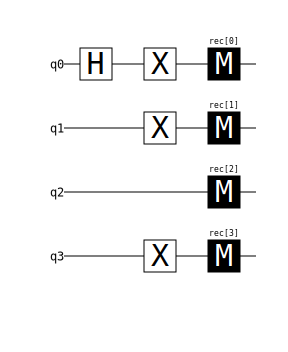

In [8]:
circuit.append("M",[0,1,2,3])
circuit.diagram("timeline-svg")

In [9]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[False  True False  True]
 [ True  True False  True]
 [ True  True False  True]
 [False  True False  True]
 [ True  True False  True]
 [ True  True False  True]
 [False  True False  True]
 [ True  True False  True]
 [False  True False  True]
 [False  True False  True]]


In [10]:
circuit = 0
circuit = stim.Circuit()

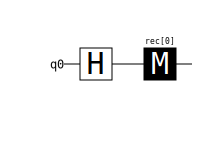

In [11]:
circuit.append_operation('H', [0])
circuit.append_operation('M', [0])
circuit.diagram("timeline-svg")

In [12]:
sampler = 0
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]]


In [13]:
circuit = 0

In [14]:
circuit_2 = stim.Circuit.generated(
    "repetition_code:memory",
    rounds=1,
    distance=2,
    before_round_data_depolarization=0.04,
    before_measure_flip_probability=0.01
    )


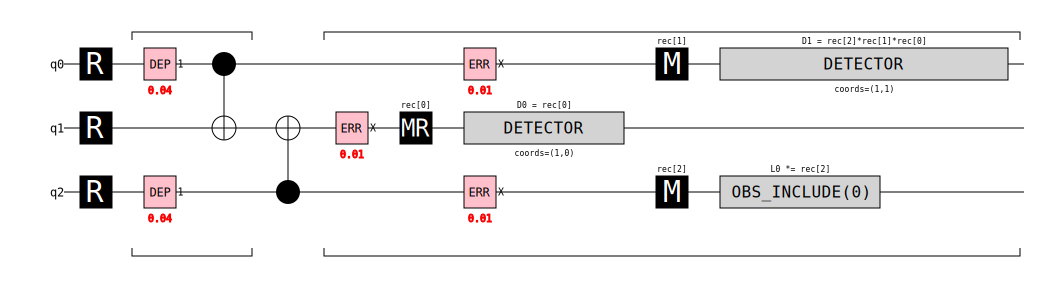

In [15]:
circuit_2.diagram('timeline-svg')

```Args
code_task: A string identifying the type of circuit to generate. Available code tasks are: - "repetition_code:memory" - "surface_code:rotated_memory_x" - "surface_code:rotated_memory_z" - "surface_code:unrotated_memory_x" - "surface_code:unrotated_memory_z" - "color_code:memory_xyz"
distance: The desired code distance of the generated circuit. The code distance is the minimum number of physical errors needed to cause a logical error. This parameter indirectly determines how many qubits the generated circuit uses.
rounds: How many times the measurement qubits in the generated circuit will be measured. Indirectly determines the duration of the generated circuit.```

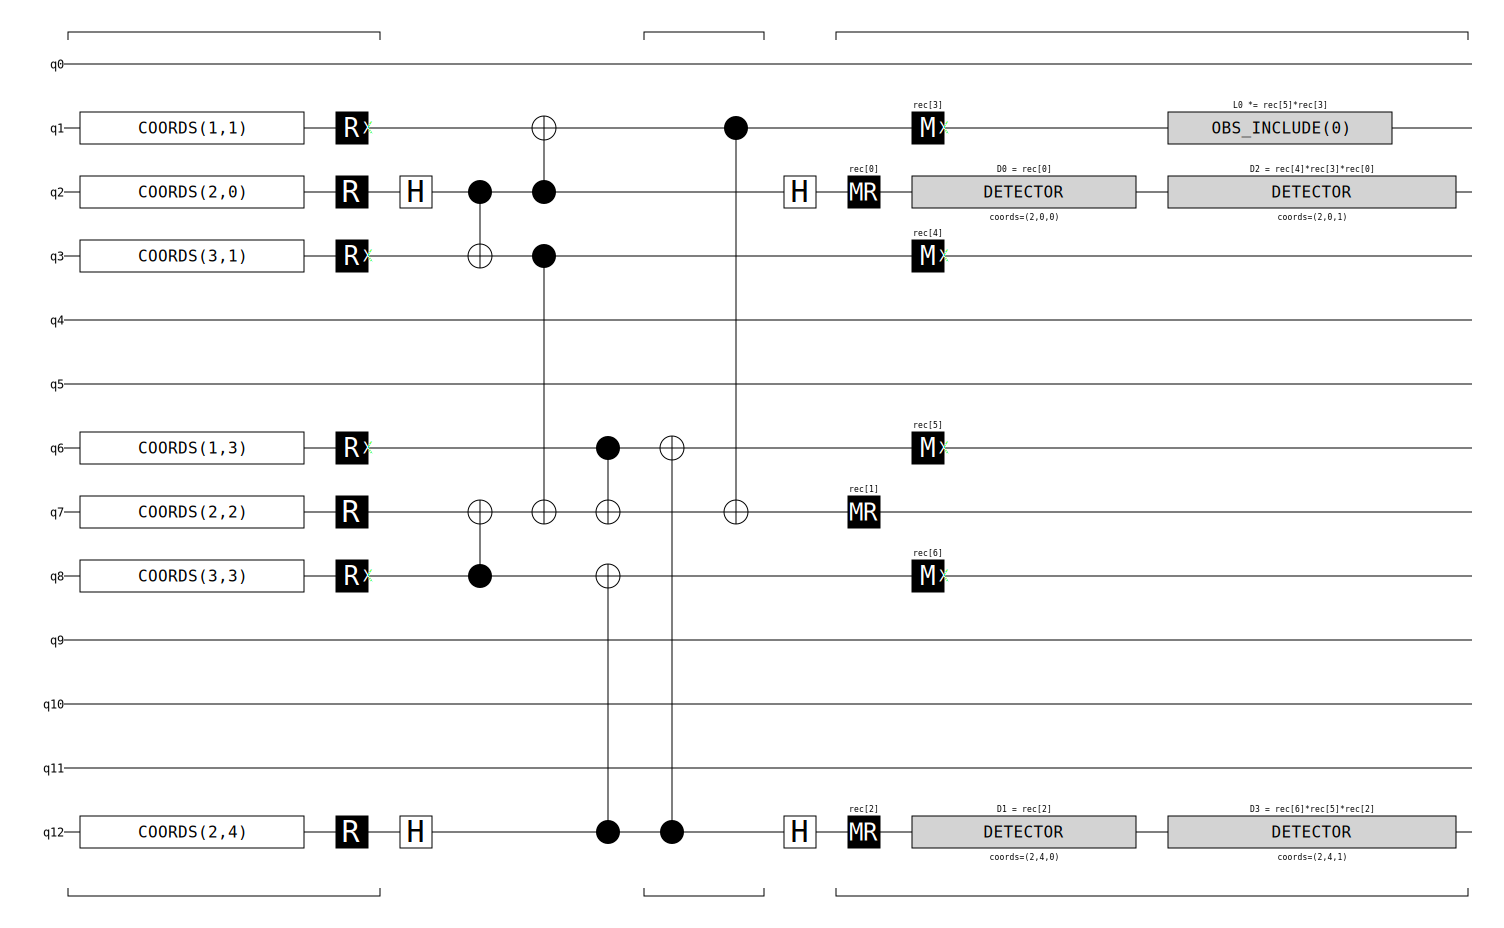

In [16]:
circuit_3 = 0
circuit_3 = stim.Circuit.generated(
    
    "surface_code:rotated_memory_x",
    rounds=1,
    distance=2,
    
    )
circuit_3.diagram("timeline-svg")

In [17]:
print(circuit_3)

QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(1, 3) 6
QUBIT_COORDS(2, 2) 7
QUBIT_COORDS(3, 3) 8
QUBIT_COORDS(2, 4) 12
RX 1 3 6 8
R 2 7 12
TICK
H 2 12
TICK
CX 2 3 8 7
TICK
CX 2 1 3 7
TICK
CX 12 8 6 7
TICK
CX 12 6 1 7
TICK
H 2 12
TICK
MR 2 7 12
DETECTOR(2, 0, 0) rec[-3]
DETECTOR(2, 4, 0) rec[-1]
MX 1 3 6 8
DETECTOR(2, 0, 1) rec[-3] rec[-4] rec[-7]
DETECTOR(2, 4, 1) rec[-1] rec[-2] rec[-5]
OBSERVABLE_INCLUDE(0) rec[-2] rec[-4]


In [18]:
circuit_3.compile_detector_sampler().sample(shots=1)

array([[False, False, False, False]])

In [19]:
# Path to your Stim circuit text file
# file_path = "test_circ.txt"

# circuit = 0
# # Read the circuit text
# with open(file_path, "r") as f:
#     circuit_text = f.read()

# # Create a Stim circuit from the text
# circuit = stim.Circuit(circuit_text)

# # Optional: print the circuit to check
# print(circuit)
# circuit.diagram("timeline-svg")

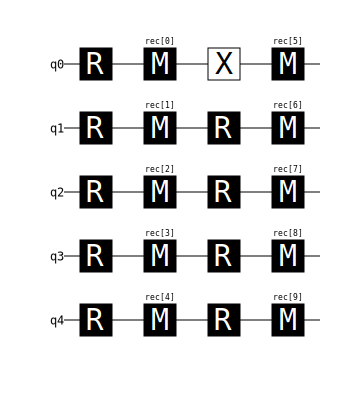

In [20]:
# Deterministic circuit
circuit = stim.Circuit("""
    R 0
    R 1
    R 2 
    R 3
    R 4
    M 0
    M 1
    M 2
    M 3
    M 4
    X 0
    R 1
    R 2 
    R 3
    R 4
    M 0
    M 1
    M 2
    M 3
    M 4
""")
circuit.diagram("timeline-svg")


In [21]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=5))

[[False False False False False  True False False False False]
 [False False False False False  True False False False False]
 [False False False False False  True False False False False]
 [False False False False False  True False False False False]
 [False False False False False  True False False False False]]


In [22]:
logging = True
h_qubits = set()
mr_qubits = set()
m_qubits = set()

for inst in circuit:
    print (inst)
    print("-------")
    # Case 1: Normal instruction
    if hasattr(inst, "targets_copy"):
        name = inst.name
        targets = [t.value for t in inst.targets_copy()]
        print (name)

        if name == "H":
            h_qubits.update(targets)
            if logging:
                print(f"• Hadamard (H) applied → qubits {targets}")

        elif name == "MR":
            mr_qubits.update(targets)
            if logging:
                print(f"• Measurement-Reset (MR) → qubits {targets}")

        elif name.startswith("M"):  # includes M, MX, MY, MR
            m_qubits.update(targets)
            if logging:
                print(f"• Measurement ({name}) → qubits {targets}")

R 0 1 2 3 4
-------
R
M 0 1 2 3 4
-------
M
• Measurement (M) → qubits [0, 1, 2, 3, 4]
X 0
-------
X
R 1 2 3 4
-------
R
M 0 1 2 3 4
-------
M
• Measurement (M) → qubits [0, 1, 2, 3, 4]


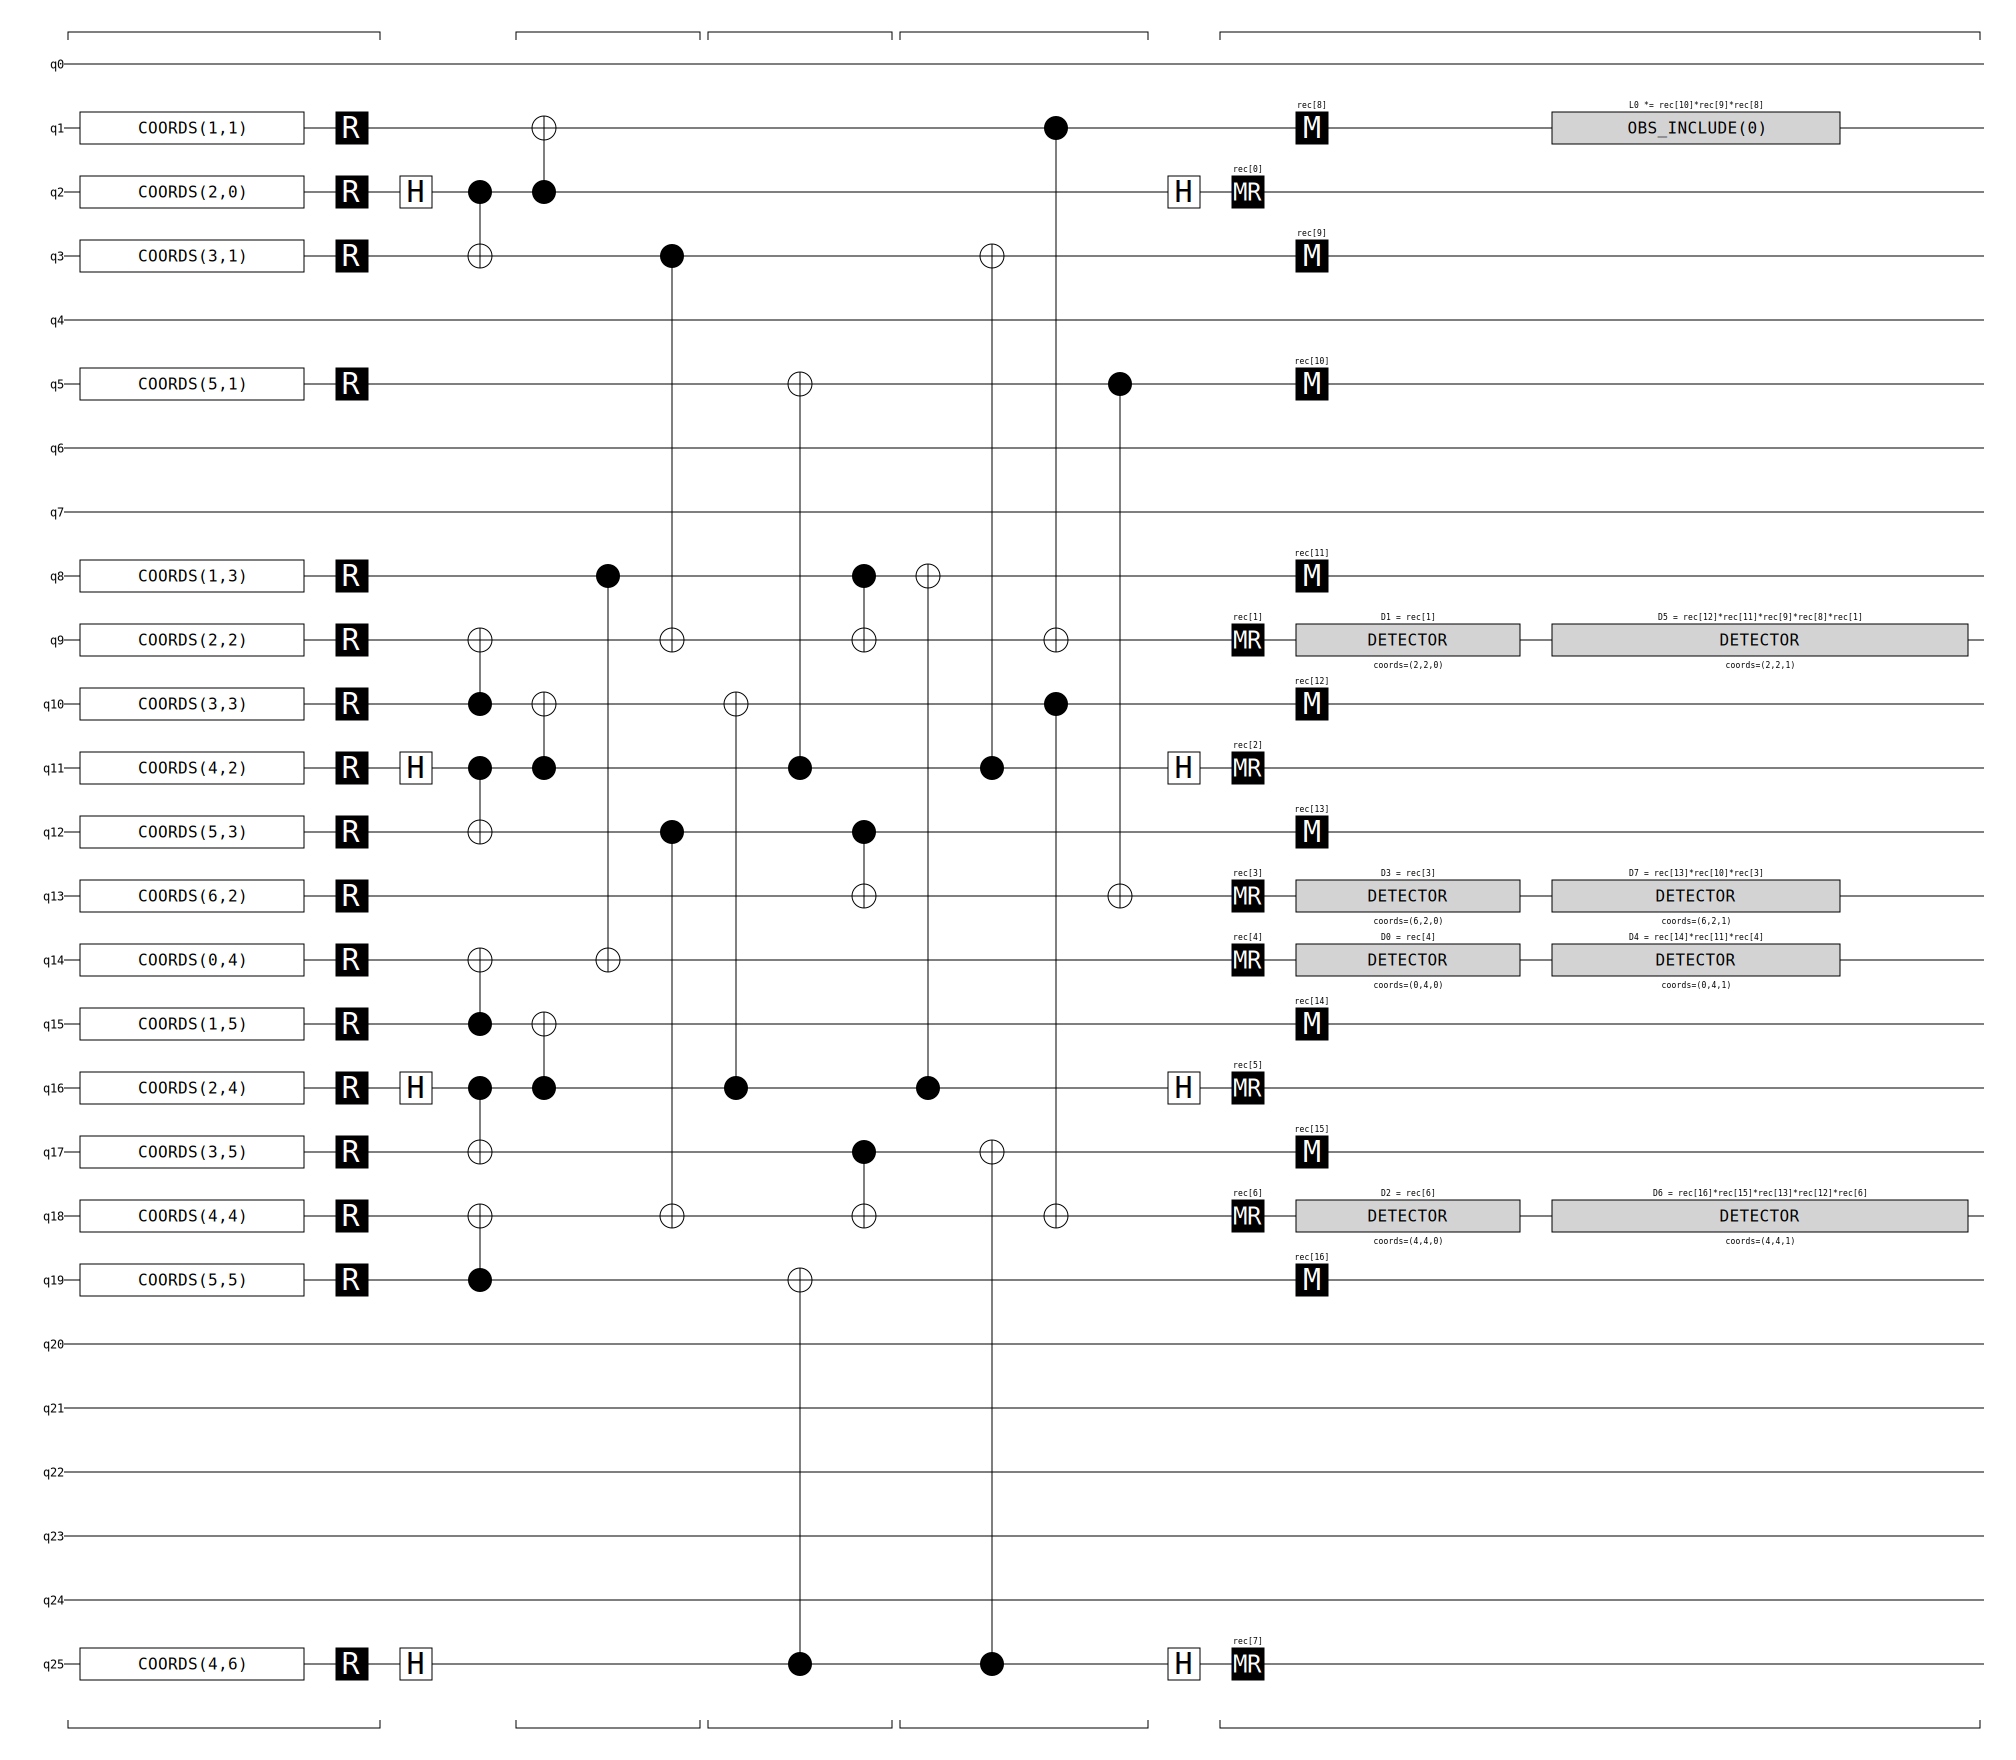

In [23]:
CIRC_STR = """QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
TICK
H 2 11 16 25
TICK
CX 2 3 16 17 11 12 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17 1 9 10 18 5 13
TICK
H 2 11 16 25
TICK
MR 2 9 11 13 14 16 18 25
DETECTOR(0, 4, 0) rec[-4]
DETECTOR(2, 2, 0) rec[-7]
DETECTOR(4, 4, 0) rec[-2]
DETECTOR(6, 2, 0) rec[-5]
M 1 3 5 8 10 12 15 17 19
DETECTOR(0, 4, 1) rec[-3] rec[-6] rec[-13]
DETECTOR(2, 2, 1) rec[-5] rec[-6] rec[-8] rec[-9] rec[-16]
DETECTOR(4, 4, 1) rec[-1] rec[-2] rec[-4] rec[-5] rec[-11]
DETECTOR(6, 2, 1) rec[-4] rec[-7] rec[-14]
OBSERVABLE_INCLUDE(0) rec[-7] rec[-8] rec[-9]
"""
circuit = 0
circuit= stim.Circuit(CIRC_STR)
circuit.diagram("timeline-svg")

In [24]:
circuit.compile_detector_sampler().sample(shots=1)

array([[False, False, False, False, False, False, False, False]])

In [25]:
circuit.compile_sampler().sample(shots=1)

array([[ True, False,  True, False, False, False, False, False, False,
        False, False,  True,  True, False,  True,  True, False]])

In [26]:
import stim

c = stim.Circuit("""
H 0
H 1
M 1 0
""")

meas_qubits = []
for instr in c:
    if instr.name == "M":
        meas_qubits.extend(instr.targets_copy())
print(meas_qubits)  # [1, 0]


[stim.GateTarget(1), stim.GateTarget(0)]


In [27]:
import stim

circuit = stim.Circuit(CIRC_STR)

measured_qubits = []
for instr in circuit:
    if instr.name in ["MR", "MX"]:
        measured_qubits.extend(instr.targets_copy())

print(measured_qubits)
# Output: [2, 7, 12, 1, 3, 6, 8]


[stim.GateTarget(2), stim.GateTarget(9), stim.GateTarget(11), stim.GateTarget(13), stim.GateTarget(14), stim.GateTarget(16), stim.GateTarget(18), stim.GateTarget(25)]


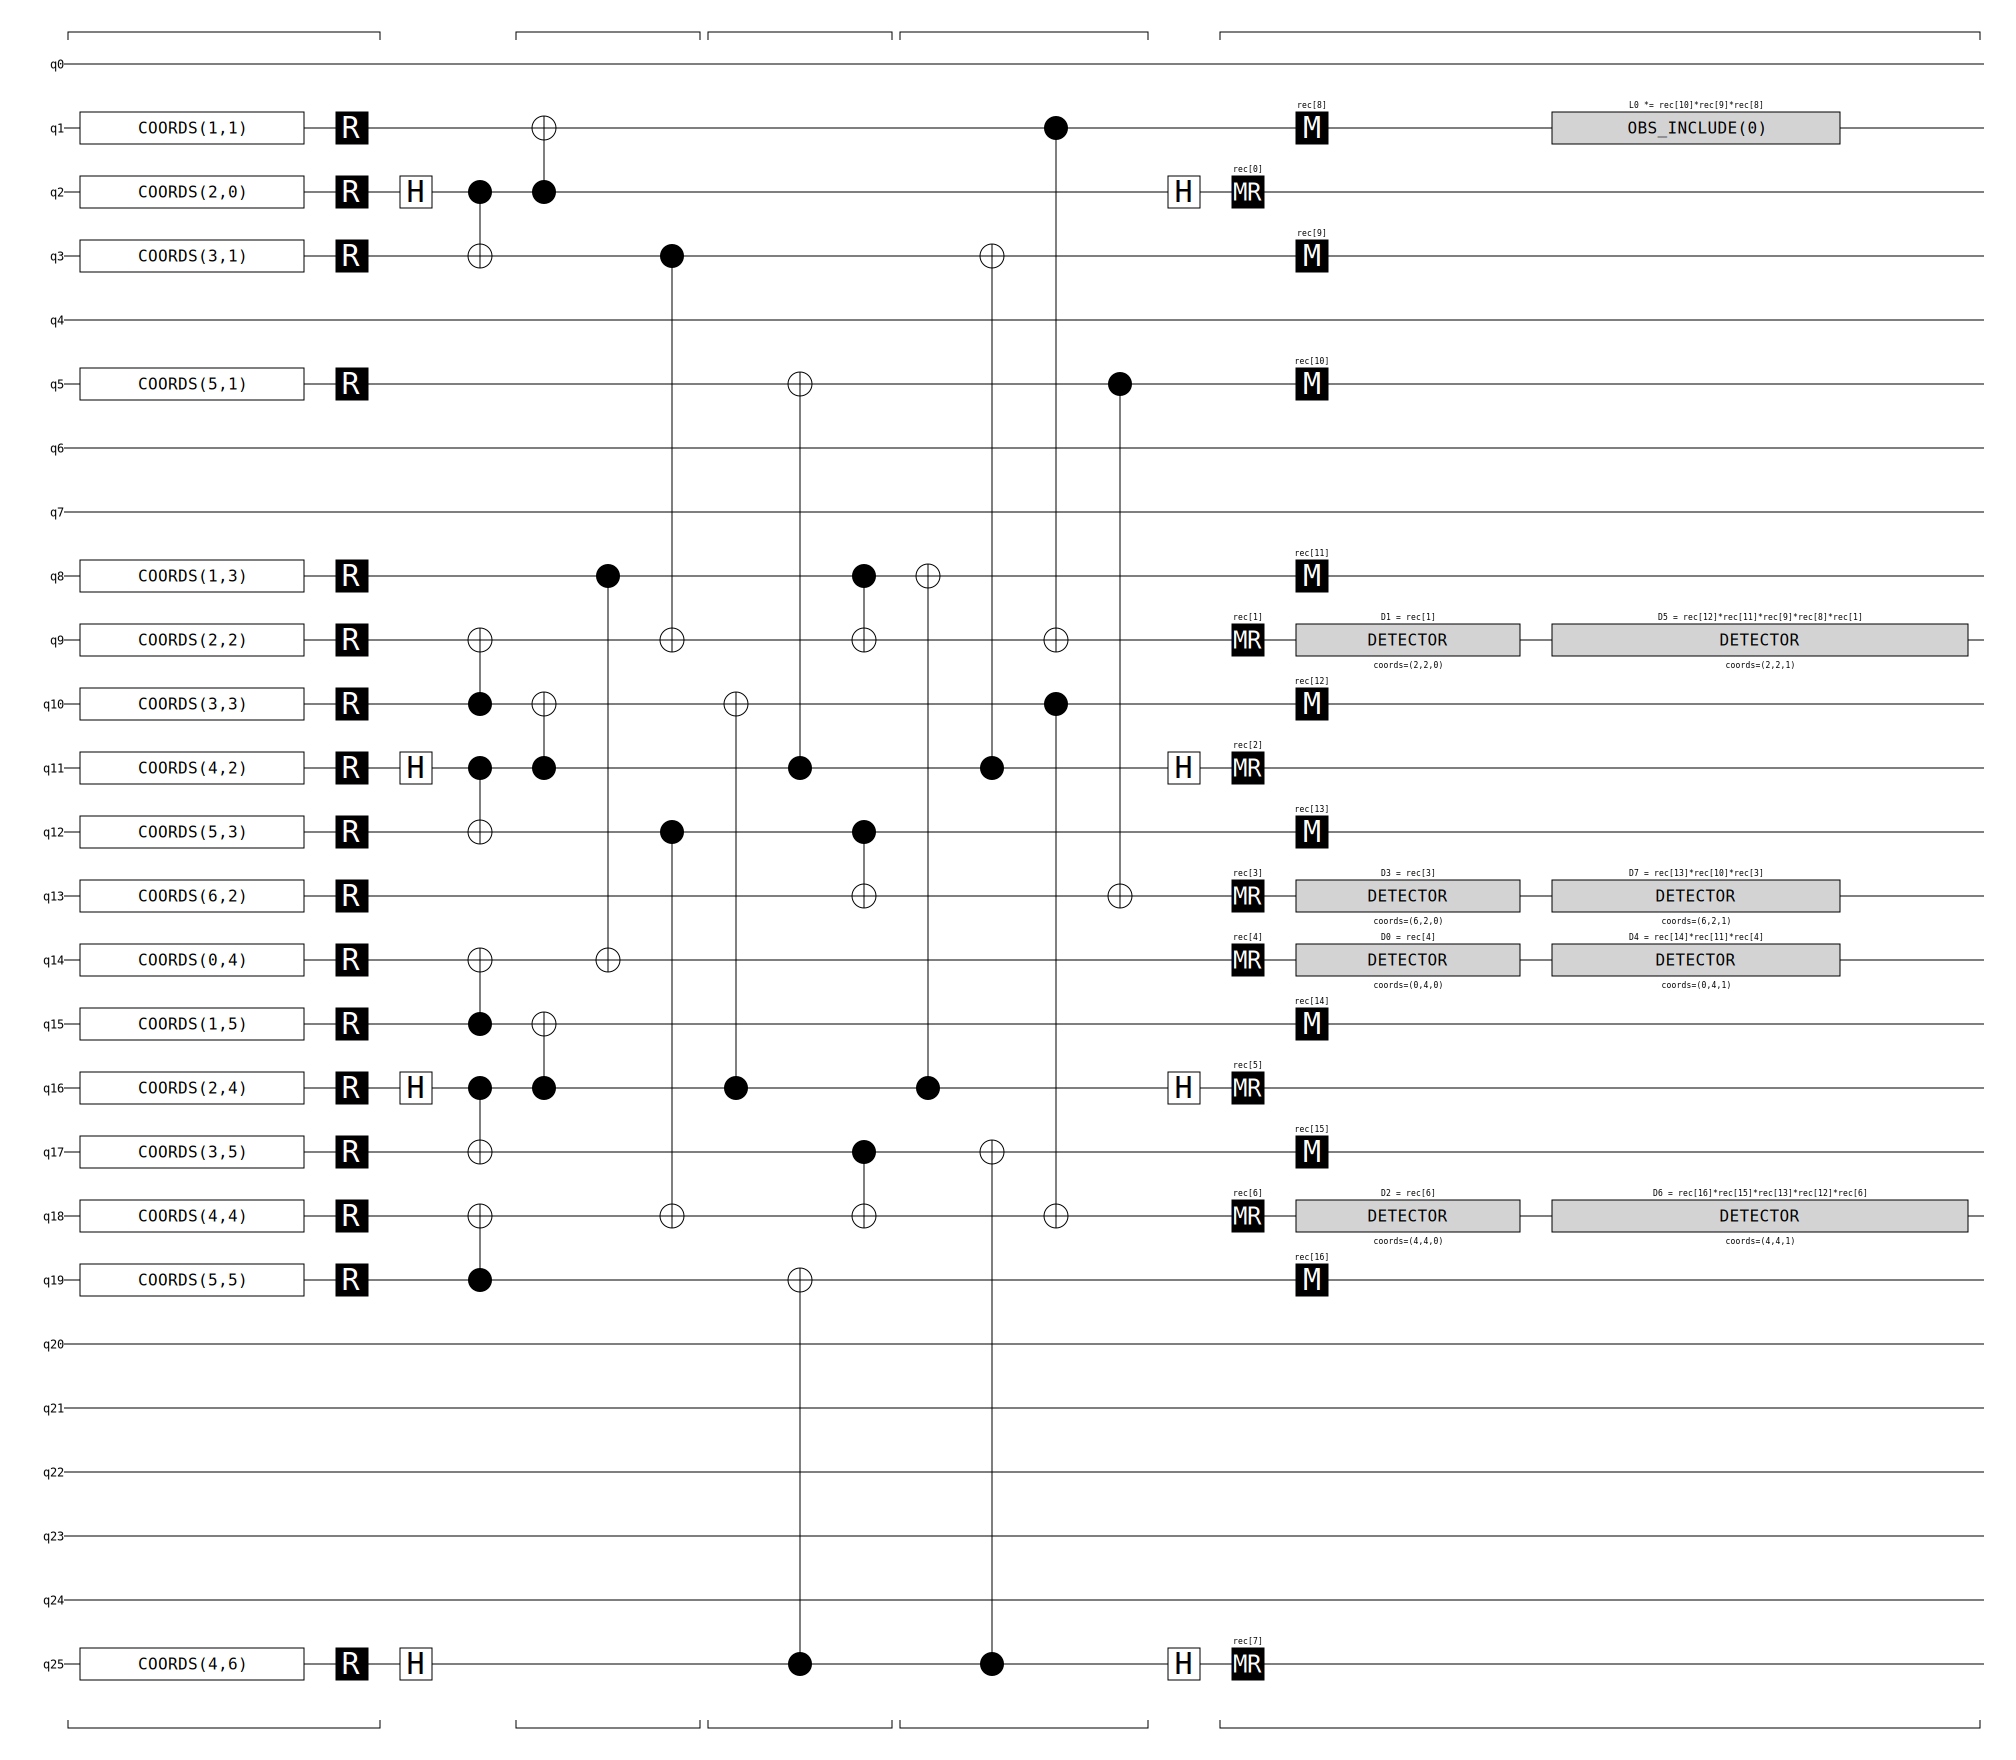

In [28]:
CIRC_STR = """QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
TICK
H 2 11 16 25
TICK
CX 2 3 16 17 11 12 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17 1 9 10 18 5 13
TICK
H 2 11 16 25
TICK
MR 2 9 11 13 14 16 18 25
DETECTOR(0, 4, 0) rec[-4]
DETECTOR(2, 2, 0) rec[-7]
DETECTOR(4, 4, 0) rec[-2]
DETECTOR(6, 2, 0) rec[-5]
M 1 3 5 8 10 12 15 17 19
DETECTOR(0, 4, 1) rec[-3] rec[-6] rec[-13]
DETECTOR(2, 2, 1) rec[-5] rec[-6] rec[-8] rec[-9] rec[-16]
DETECTOR(4, 4, 1) rec[-1] rec[-2] rec[-4] rec[-5] rec[-11]
DETECTOR(6, 2, 1) rec[-4] rec[-7] rec[-14]
OBSERVABLE_INCLUDE(0) rec[-7] rec[-8] rec[-9]
"""
circuit = 0
circuit= stim.Circuit(CIRC_STR)
circuit.diagram("timeline-svg")

In [29]:
import stim
from typing import List, Dict

def parse_sampler_with_H(circuit: stim.Circuit, sample: List[bool]) -> Dict[int, Dict]:
    """
    Parse a stim sample and label measurements as 'ancilla_X' if an H gate was applied before
    measurement, otherwise 'data_Z'.
    
    Args:
        circuit: stim.Circuit object
        sample: 1D list of bools from sampler.sample(shots=1)[0]
        
    Returns:
        dict: column_index -> {'qubit': int, 'label': str, 'value': bool}
    """
    # Track the last basis state for each qubit
    qubit_basis = {}  # qubit -> 'Z' (default) or 'X' if H applied
    measured_qubits = []
    basis_list = []
    
    # First, build the measurement order and track basis
    for instr in circuit:
        if instr.name == "H":
            for q in instr.targets_copy():
                # flip basis: if Z -> X, if X -> Z
                if qubit_basis.get(q, 'Z') == 'Z':
                    qubit_basis[q] = 'X'
                else:
                    qubit_basis[q] = 'Z'
        elif instr.name in ["MR", "M", "MX"]:
            measured_qubits.extend(instr.targets_copy())
            # For labeling
            for q in instr.targets_copy():
                if qubit_basis.get(q, 'Z') == 'X':
                    basis_list.append('X')  # had H before measurement
                else:
                    basis_list.append('Z')  # no H
                # reset basis after measurement if MR
                if instr.name == "MR":
                    qubit_basis[q] = 'Z'
    
    # Build final mapping
    mapping = {}
    for i, val in enumerate(sample):
        if i < len(measured_qubits):
            q = measured_qubits[i]
            label = 'ancilla_X' if basis_list[i] == 'X' else 'data_Z'
            mapping[i] = {
                'qubit': q,
                'label': label,
                'value': val
            }
        else:
            mapping[i] = 'internal/derived'
    
    return mapping


In [30]:
sample = [True, False, False, False, False, False, False, True, True, False, True, True, False, True, True, True, False]
parse_sampler_with_H(circuit, sample)

{0: {'qubit': stim.GateTarget(2), 'label': 'data_Z', 'value': True},
 1: {'qubit': stim.GateTarget(9), 'label': 'data_Z', 'value': False},
 2: {'qubit': stim.GateTarget(11), 'label': 'data_Z', 'value': False},
 3: {'qubit': stim.GateTarget(13), 'label': 'data_Z', 'value': False},
 4: {'qubit': stim.GateTarget(14), 'label': 'data_Z', 'value': False},
 5: {'qubit': stim.GateTarget(16), 'label': 'data_Z', 'value': False},
 6: {'qubit': stim.GateTarget(18), 'label': 'data_Z', 'value': False},
 7: {'qubit': stim.GateTarget(25), 'label': 'data_Z', 'value': True},
 8: {'qubit': stim.GateTarget(1), 'label': 'data_Z', 'value': True},
 9: {'qubit': stim.GateTarget(3), 'label': 'data_Z', 'value': False},
 10: {'qubit': stim.GateTarget(5), 'label': 'data_Z', 'value': True},
 11: {'qubit': stim.GateTarget(8), 'label': 'data_Z', 'value': True},
 12: {'qubit': stim.GateTarget(10), 'label': 'data_Z', 'value': False},
 13: {'qubit': stim.GateTarget(12), 'label': 'data_Z', 'value': True},
 14: {'qubit':

In [31]:
R1 = [False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, False] # Round 1
R2 =[False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, False] # ROund 2
R3 = [False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, True, True, False, True] #Round 3
R4 =[False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, True, True, False, True] #Round 4


In [32]:
R1[:8] == R2[:8]

True

In [33]:
R2[:16] == R3[:16]

True

In [34]:
R3[:25] ==  R4[:25]

True

In [35]:
type(circuit)

stim._stim_sse2.Circuit

In [36]:
print(circuit.to_tableau(ignore_reset=True, ignore_measurement=True))

+-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-xz-
| ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++ ++
| XZ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ XZ _X __ __ __ __ __ __ _Z __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ _X XZ _X __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ __ _X XZ __ __ __ __ __ _Z __ _X __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ __ __ __ XZ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ __ __ __ __ XZ __ __ __ __ __ _X __ _Z __ __ __ __ __ __ __ __ __ __ __ __
| __ __ __ __ __ __ XZ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ __ __ __ __ __ __ XZ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ __ __ __ __ __ __ __ XZ _Z __ __ __ __ _Z __ _X __ __ __ __ __ __ __ __ __
| __ X_ __ X_ __ __ __ __ X_ XZ X_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
| __ __ __ __ __ __ __ __ __ _Z XZ _X _

In [37]:
circuit = 0
circuit = stim.Circuit.from_file("../output/test_circ.txt")
print(circuit)
circuit.diagram("timeline-svg-html")

QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
TICK
H 2 11 16 25
TICK
CX 2 3 16 17 11 12 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17 1 9 10 18 5 13
TICK
H 2 11 16 25
TICK
MR 2 9 11 13 14 16 18 25
DETECTOR(0, 4, 0) rec[-4]
DETECTOR(2, 2, 0) rec[-7]
DETECTOR(4, 4, 0) rec[-2]
DETECTOR(6, 2, 0) rec[-5]
TICK
H 2 11 16 25
TICK
CX 2 3 16 17 11 12 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17 1 9 10 18 5 13
TICK
H 2 11 16 25
TICK
MR 2 9 11 13 14 16 18 25
SHIFT_COORDS(0, 0, 1)
DETECTO

<svg viewBox="0 0 3168 1760"  version="1.1" xmlns="http://www.w3.org/2000/svg">
<g id="qubit_lines">
<path id="qubit_line:0" d="M64,64 L3136,64 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="64">q0</text>
<path id="qubit_line:1" d="M64,128 L3136,128 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="128">q1</text>
<path id="qubit_line:2" d="M64,192 L3136,192 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="192">q2</text>
<path id="qubit_line:3" d="M64,256 L3136,256 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="256">q3</text>
<path id="qubit_line:4" d="M64,320 L3136,320 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="320">q4</text>
<path id="qubit_line:5" d="M64,384 L3136,384 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="384">q5</text>
<path id="qubit_line:6" d="M64,448 L3136,448 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="448">q6</text>
<path id="qubit_line:7" d="M64,512 L3136,512 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="512">q7</text>
<path id="qubit_line:8" d="M64,576 L3136,576 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="576">q8</text>
<path id="qubit_line:9" d="M64,640 L3136,640 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="640">q9</text>
<path id="qubit_line:10" d="M64,704 L3136,704 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="704">q10</text>
<path id="qubit_line:11" d="M64,768 L3136,768 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="768">q11</text>
<path id="qubit_line:12" d="M64,832 L3136,832 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="832">q12</text>
<path id="qubit_line:13" d="M64,896 L3136,896 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="896">q13</text>
<path id="qubit_line:14" d="M64,960 L3136,960 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="960">q14</text>
<path id="qubit_line:15" d="M64,1024 L3136,1024 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="1024">q15</text>
<path id="qubit_line:16" d="M64,1088 L3136,1088 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="1088">q16</text>
<path id="qubit_line:17" d="M64,1152 L3136,1152 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="1152">q17</text>
<path id="qubit_line:18" d="M64,1216 L3136,1216 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="1216">q18</text>
<path id="qubit_line:19" d="M64,1280 L3136,1280 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="1280">q19</text>
<path id="qubit_line:20" d="M64,1344 L3136,1344 " stroke="black"/>
<text dominant-baseline="central" text-anchor="end" font-family="monospace" font-size="12" x="64" y="1344">q20</text>
<path id="qubit_line:21" d="M64,1408 L3136,1408 " stroke="black"/>
<text dominant-

In [38]:

h_qubits = set()
mr_qubits = set()
m_qubits = set()
for inst in circuit:
    name = inst.name

    if name == "H":
        print("Hadamard on", [t.value for t in inst.targets_copy()])
        h_qubits.update(t.value for t in inst.targets_copy())

    elif name == "MR":
        print("Measurement-Reset on", [t.value for t in inst.targets_copy()])
        mr_qubits.update(t.value for t in inst.targets_copy())

    elif name.startswith("M"):  # includes M, MX, MY, MR (if you want MR separate, check first!)
        print("Measurement:", name, "on", [t.value for t in inst.targets_copy()])
        m_qubits.update(t.value for t in inst.targets_copy())

# Intersection
common = h_qubits & mr_qubits
# Difference
h_only = h_qubits - mr_qubits
mr_only = mr_qubits - h_qubits
print("------------------------")
print("Qubits with H:", h_qubits)
print("Qubits with MR:", mr_qubits)
print("Intersection (H ∩ MR):", common)
print("MR only:", mr_only)

Hadamard on [2, 11, 16, 25]
Hadamard on [2, 11, 16, 25]
Measurement-Reset on [2, 9, 11, 13, 14, 16, 18, 25]
Hadamard on [2, 11, 16, 25]
Hadamard on [2, 11, 16, 25]
Measurement-Reset on [2, 9, 11, 13, 14, 16, 18, 25]
Measurement: M on [1, 3, 5, 8, 10, 12, 15, 17, 19]
------------------------
Qubits with H: {16, 25, 2, 11}
Qubits with MR: {2, 9, 11, 13, 14, 16, 18, 25}
Intersection (H ∩ MR): {16, 25, 2, 11}
MR only: {9, 18, 13, 14}


In [39]:
import stim

c = stim.Circuit("""
H 0
REPEAT 3 {
    MR 0
    M 0
}
""")

for inst in c:
    if isinstance(inst, stim.CircuitInstruction):
        print("Instruction:", inst.name, [t.value for t in inst.targets_copy()])
    elif isinstance(inst, stim.CircuitRepeatBlock):
        print(f"Repeat block ×{inst.repeat_count}")
        # get inner circuit
        inner = inst.body_copy()
        for sub in inner:
            print("  Sub-instruction:", sub.name, [t.value for t in sub.targets_copy()])


Instruction: H [0]
Repeat block ×3
  Sub-instruction: MR [0]
  Sub-instruction: M [0]


In [45]:
surface_code_circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=9,
    distance=3,
    after_clifford_depolarization=0.001,
    after_reset_flip_probability=0.001,
    before_measure_flip_probability=0.001,
    before_round_data_depolarization=0.001)

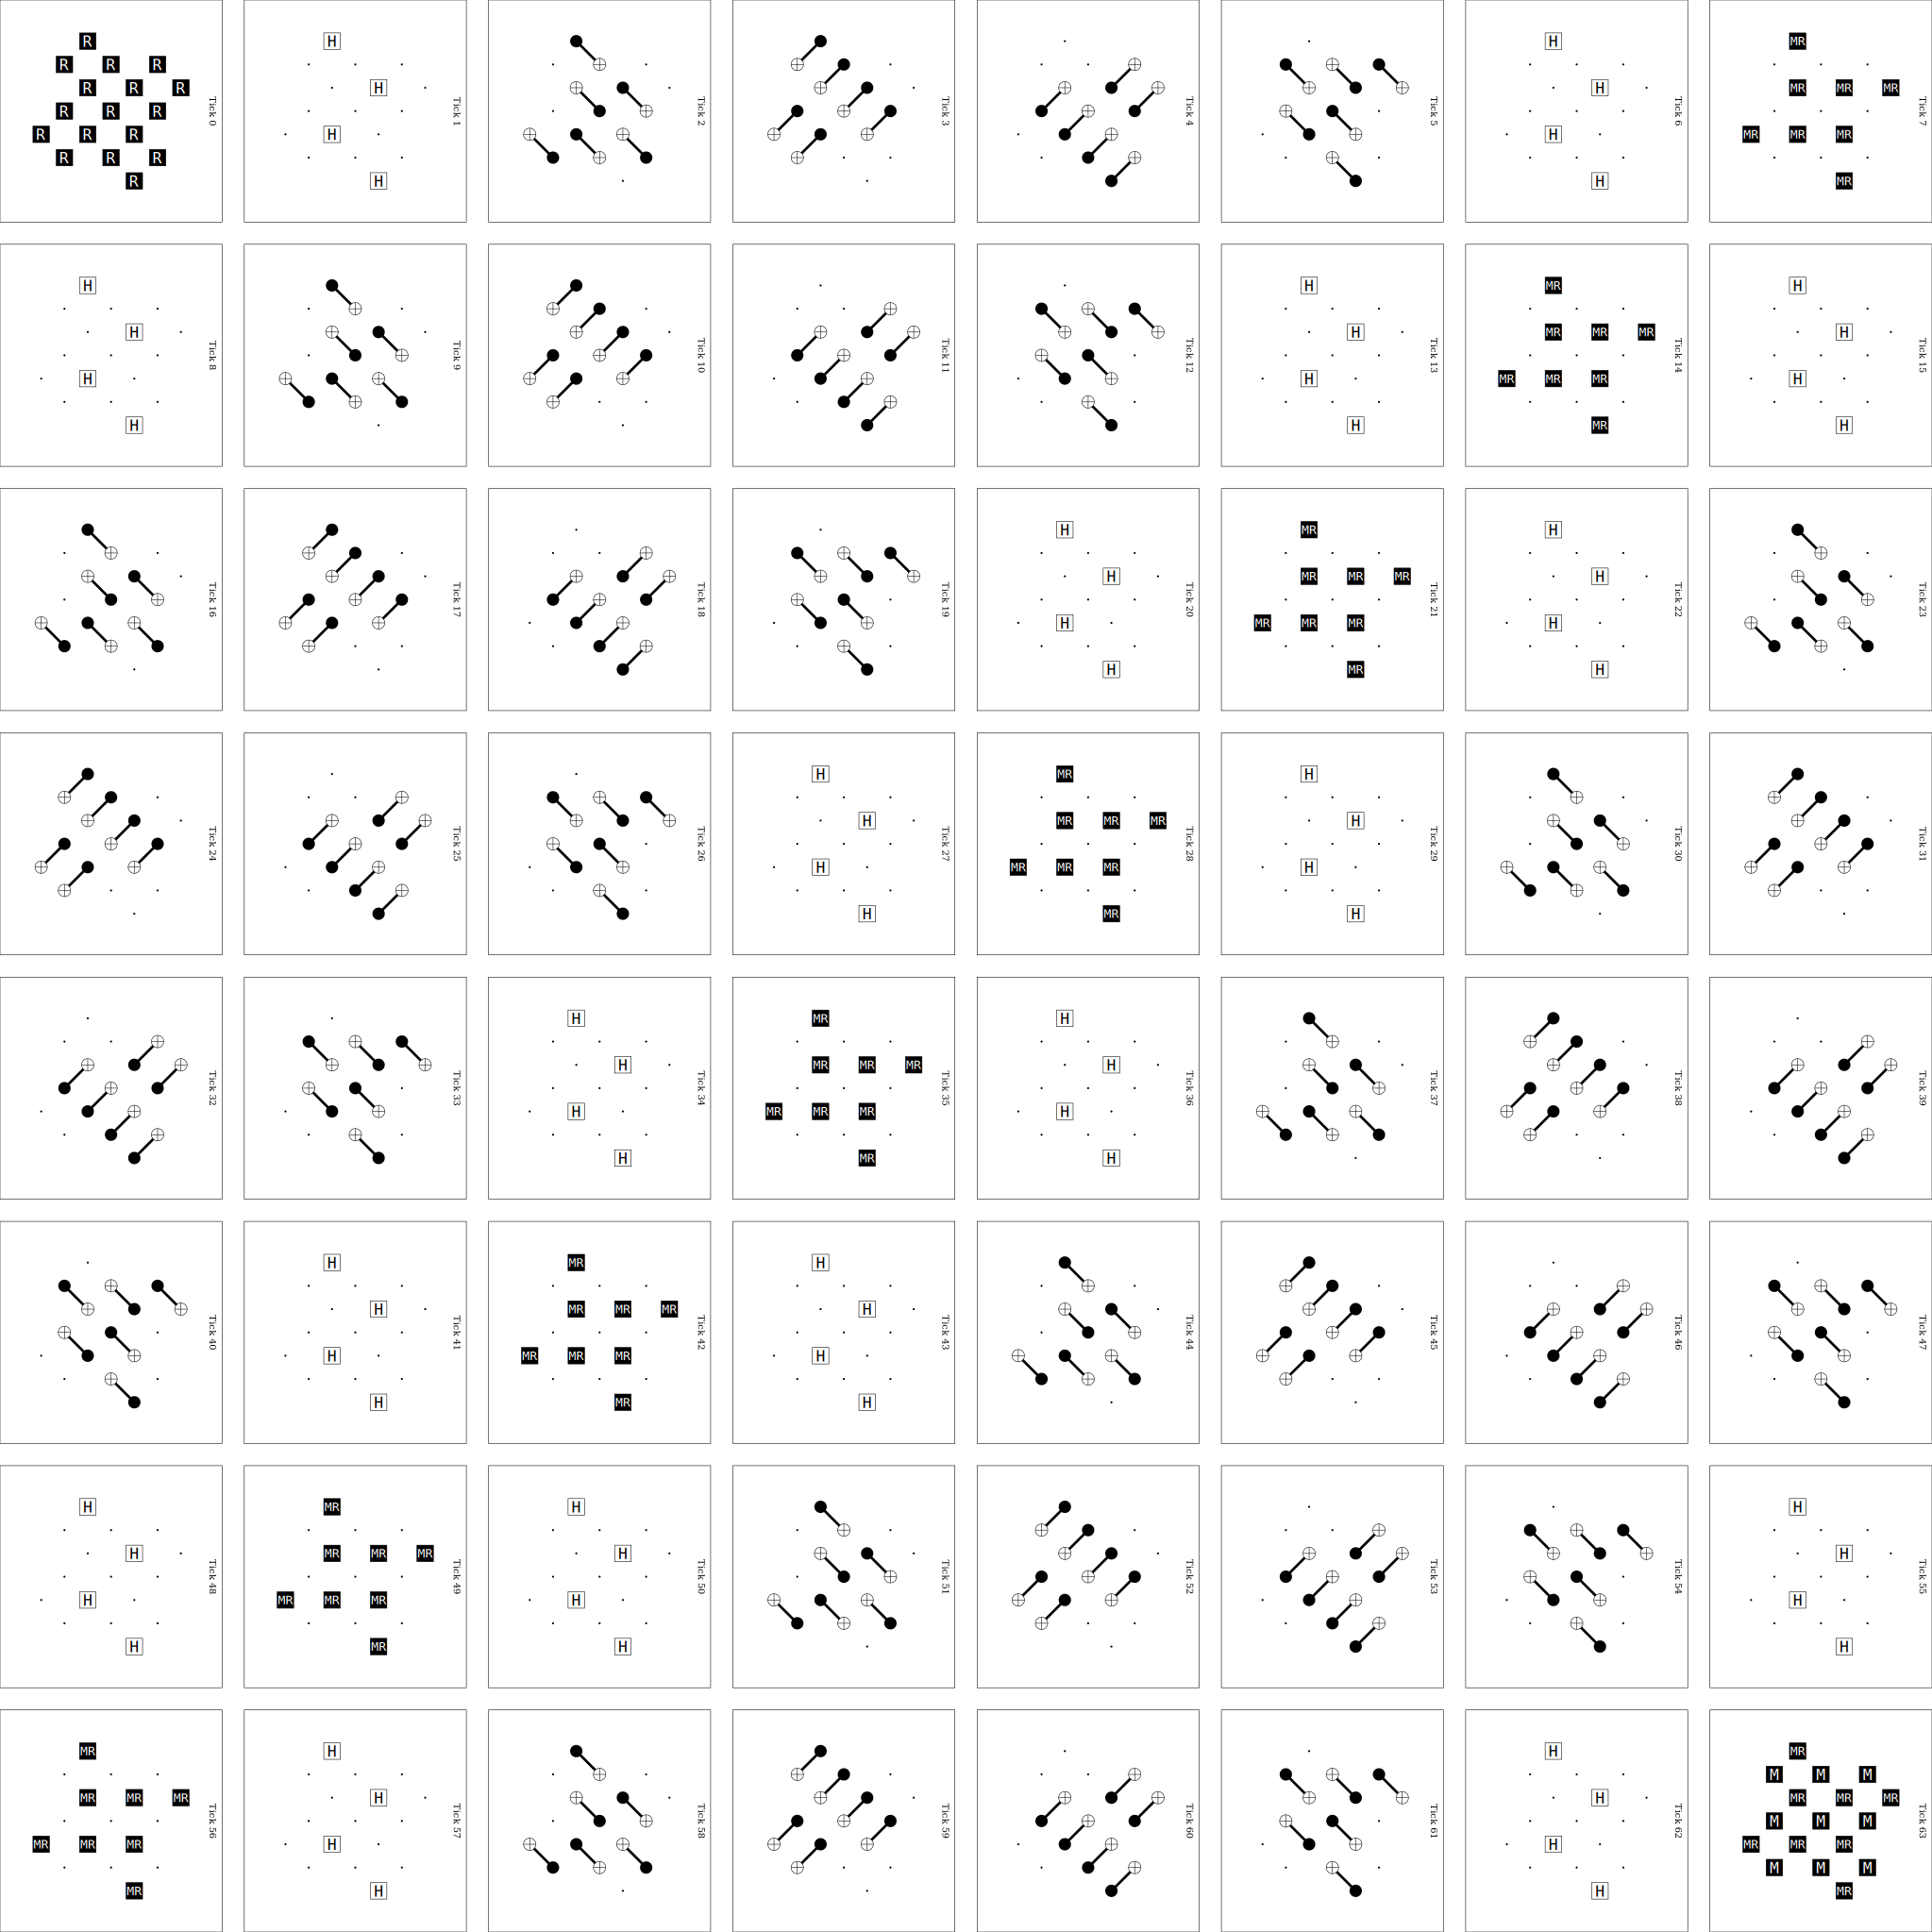

In [47]:
surface_code_circuit.without_noise().diagram("timeslice-svg")

In [1]:
test= [[{'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': True, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': False, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': False, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': True, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': False, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': False, 'type': 'data', 'coords': [5.0, 5.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}], [{'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': True, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': False, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': False, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': True, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': False, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': False, 'type': 'data', 'coords': [5.0, 5.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}], [{'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': True, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': False, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': False, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': True, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': False, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': False, 'type': 'data', 'coords': [5.0, 5.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}]]

In [2]:
len(test)

3

In [4]:
len(test[0])

99

In [5]:
test[0]

[{'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]},
 {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]},
 {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]},
 {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]},
 {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]},
 {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]},
 {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]},
 {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]},
 {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]},
 {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]},
 {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]},
 {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]},
 {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]},
 {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]},
 {'qubit': 18, 'value': 

In [6]:
test = [[{'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': True, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': True, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': False, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': False, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': True, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': False, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': False, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}], [{'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': False, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': True, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': True, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': True, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': True, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': True, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': True, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': True, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': False, 'type': 'data', 'coords': [5.0, 5.0]}], [{'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 2, 'value': False, 'type': 'ancx', 'coords': [2.0, 0.0]}, {'qubit': 9, 'value': False, 'type': 'ancz', 'coords': [2.0, 2.0]}, {'qubit': 11, 'value': True, 'type': 'ancx', 'coords': [4.0, 2.0]}, {'qubit': 13, 'value': False, 'type': 'ancz', 'coords': [6.0, 2.0]}, {'qubit': 14, 'value': False, 'type': 'ancz', 'coords': [0.0, 4.0]}, {'qubit': 16, 'value': False, 'type': 'ancx', 'coords': [2.0, 4.0]}, {'qubit': 18, 'value': False, 'type': 'ancz', 'coords': [4.0, 4.0]}, {'qubit': 25, 'value': False, 'type': 'ancx', 'coords': [4.0, 6.0]}, {'qubit': 1, 'value': False, 'type': 'data', 'coords': [1.0, 1.0]}, {'qubit': 3, 'value': False, 'type': 'data', 'coords': [3.0, 1.0]}, {'qubit': 5, 'value': False, 'type': 'data', 'coords': [5.0, 1.0]}, {'qubit': 8, 'value': False, 'type': 'data', 'coords': [1.0, 3.0]}, {'qubit': 10, 'value': False, 'type': 'data', 'coords': [3.0, 3.0]}, {'qubit': 12, 'value': False, 'type': 'data', 'coords': [5.0, 3.0]}, {'qubit': 15, 'value': False, 'type': 'data', 'coords': [1.0, 5.0]}, {'qubit': 17, 'value': True, 'type': 'data', 'coords': [3.0, 5.0]}, {'qubit': 19, 'value': True, 'type': 'data', 'coords': [5.0, 5.0]}]]

In [7]:
len(test)

3

In [8]:
len(test[0])

33